In [44]:
import pickle
import numpy as np
from sklearn.cluster import SpectralClustering, AffinityPropagation

file_path = '/media/zzs/4TB/qingliu/qing_intermediate/feat_pickle/'
fname = file_path + 'all_simmat.pickle'
with open(fname, 'rb') as fh:
    mat_dis1, mat_dis2 = pickle.load(fh)
    
print(mat_dis1.shape)


asp_ratio = []
types = []
view_point = []
objects = ['car', 'aeroplane', 'bicycle', 'bus', 'motorbike', 'train']
for oo in objects:
    fname = file_path + 'res_info_' + oo + '_train.pickle'
    print('loading object {0}'.format(oo))
    with open(fname, 'rb') as fh:
        l, _, v = pickle.load(fh)
        types += [oo for ii in range(len(v))]
        view_point += v
        asp_ratio += [l[ii].shape[1]/l[ii].shape[2] for ii in range(len(v))]
        
N = len(types)
print('total number of instances {0}'.format(N))

'''
asp_ratio = []
types = []
view_point = []
oo='car'
fname = file_path + 'res_info_' + oo + '_train.pickle'
print('loading object {0}'.format(oo))
with open(fname, 'rb') as fh:
    l, _, v = pickle.load(fh)
    types += [oo for ii in range(len(v))]
    view_point += v
    asp_ratio += [l[ii].shape[1]/l[ii].shape[2] for ii in range(len(v))]
    
N = len(types)
print('total number of instances {0}'.format(N))
'''
id_obj = np.where(np.array(types)=='motorbike')[0]
types = np.array(types)[id_obj]
view_point = np.array(view_point)[id_obj]
gridix = np.ix_(id_obj, id_obj)
mat_dis = mat_dis1[gridix]
N = len(types)
print('total number of instances {0}'.format(N))

(3549, 3549)
loading object car
loading object aeroplane
loading object bicycle
loading object bus
loading object motorbike
loading object train
total number of instances 3549
total number of instances 315


In [45]:
# mat_dis = mat_dis1[0:N, 0:N]
mat_full = np.ones_like(mat_dis)
for nn in range(mat_full.shape[0]):
    mat_full[nn] = np.append(mat_dis[0:nn, nn], mat_dis[nn, nn:])
    
print(mat_full[0:10,0:10])

np.fill_diagonal(mat_full, 0)

W_mat = 1. - mat_full
print(np.mean(W_mat))
print(np.std(W_mat))

[[ 1.          0.93369356  0.76221887  0.89582788  0.89771562  0.90362812
   0.7163469   0.91399476  0.87168409  0.73439722]
 [ 0.93369356  1.          0.88054652  0.87456637  0.87330496  0.66995166
   0.91463032  0.89050858  0.96116937  0.96180099]
 [ 0.76221887  0.88054652  1.          0.9305225   0.90857906  0.84302193
   0.79230041  0.88185415  0.90706513  0.81003212]
 [ 0.89582788  0.87456637  0.9305225   1.          0.85464052  0.87727378
   0.83209083  0.85561206  0.87115584  0.92000476]
 [ 0.89771562  0.87330496  0.90857906  0.85464052  1.          0.89737791
   0.83277707  0.89423489  0.67129928  0.90738229]
 [ 0.90362812  0.66995166  0.84302193  0.87727378  0.89737791  1.
   0.92427776  0.87060258  0.91626822  0.94554928]
 [ 0.7163469   0.91463032  0.79230041  0.83209083  0.83277707  0.92427776
   1.          0.91308155  0.84184991  0.79788758]
 [ 0.91399476  0.89050858  0.88185415  0.85561206  0.89423489  0.87060258
   0.91308155  1.          0.85305387  0.8950935 ]
 [ 0.871

In [46]:
for rr in np.random.randint(N,size=10):
    ref = rr
    print(types[ref], view_point[ref])
    dis_rst = mat_full[rr]
    min_idx = np.argsort(dis_rst)
    for tt in range(5):
        match = min_idx[tt]
        print(types[match], view_point[match], end=' ')
        
    print('.')

motorbike 315.0
motorbike 315.0 motorbike 330.0 motorbike 320.0 motorbike 305.0 motorbike 315.0 .
motorbike 265.0
motorbike 265.0 motorbike 300.0 motorbike 295.0 motorbike 310.0 motorbike 300.0 .
motorbike 105.0
motorbike 105.0 motorbike 95.0 motorbike 270.0 motorbike 90.0 motorbike 60.0 .
motorbike 250.0
motorbike 250.0 motorbike 275.0 motorbike 270.0 motorbike 280.0 motorbike 265.0 .
motorbike 185.0
motorbike 185.0 motorbike 120.0 motorbike 5.0 motorbike 350.0 motorbike 305.0 .
motorbike 80.0
motorbike 80.0 motorbike 90.0 motorbike 75.0 motorbike 80.0 motorbike 90.0 .
motorbike 260.0
motorbike 260.0 motorbike 300.0 motorbike 240.0 motorbike 310.0 motorbike 265.0 .
motorbike 50.0
motorbike 50.0 motorbike 80.0 motorbike 55.0 motorbike 235.0 motorbike 65.0 .
motorbike 55.0
motorbike 55.0 motorbike 45.0 motorbike 50.0 motorbike 120.0 motorbike 40.0 .
motorbike 15.0
motorbike 15.0 motorbike 245.0 motorbike 45.0 motorbike 270.0 motorbike 320.0 .


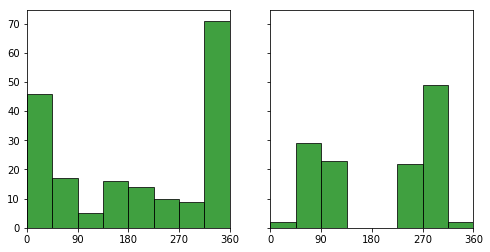

/home/qin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3549 but corresponding boolean dimension is 315


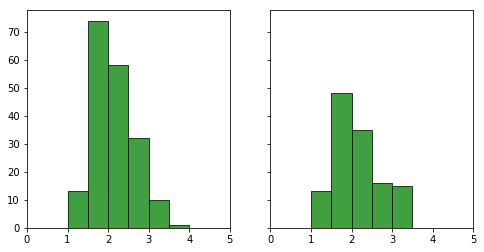

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

K = 2
cls_solver = SpectralClustering(n_clusters=K,affinity='precomputed', random_state=666)
lb = cls_solver.fit_predict(W_mat)
# af = AffinityPropagation(preference=0.00005, affinity = 'precomputed').fit(W_mat)
# cluster_centers_indices = af.cluster_centers_indices_
# lb = af.labels_
# print(np.unique(lb))

f, axes = plt.subplots(1,K, sharex=True, sharey=True, figsize=(8,4))
axes[0].set_xlim([0,360])
axes[0].set_xticks([0,90,180,270,360])

for k in range(K):
    axes[k].hist(np.array(view_point)[lb==k], bins=8, range=[0,360], facecolor='green', alpha=0.75,edgecolor='k')

plt.show()

f, axes = plt.subplots(1,K, sharex=True, sharey=True, figsize=(8,4))
axes[0].set_xlim([0,5])
axes[0].set_xticks([0,1,2,3,4,5])

for k in range(K):
    axes[k].hist(np.array(asp_ratio)[lb==k], bins=10, range=[0,5], facecolor='green', alpha=0.75,edgecolor='k')

plt.show()


In [48]:
np.mean(W_mat)

0.10672790727122669

0.102773849277 0.0925358901932
0.179842815059 0.108290105132


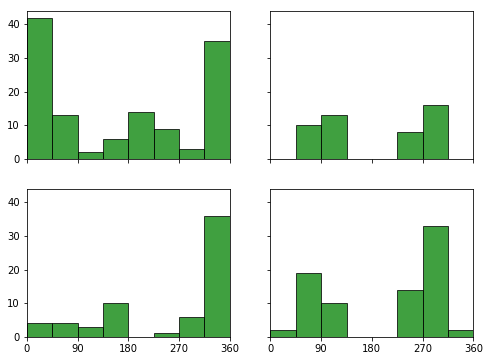

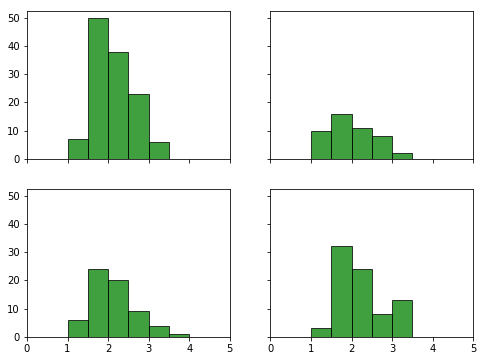

In [49]:
idx2 = []
W_mat2 = []
lb2 = []
for k in range(K):
    idx2.append(np.where(lb==k)[0])
    W_mat2.append(W_mat[np.ix_(idx2[k],idx2[k])])
    print(np.mean(W_mat2[k]), np.std(W_mat2[k]))
    
    cls_solver = SpectralClustering(n_clusters=2,affinity='precomputed', random_state=999)
    lb2.append(cls_solver.fit_predict(W_mat2[k]))
    
K2=2
f, axes = plt.subplots(2,K, sharex=True, sharey=True, figsize=(8,6))
axes[0][0].set_xlim([0,360])
axes[0][0].set_xticks([0,90,180,270,360])
for k in range(K2*K):
    a = k//2
    b = k%2
    axes[b][a].hist(np.array(view_point)[idx2[a]][lb2[a]==b], bins=8, range=[0,360], facecolor='green', alpha=0.75, edgecolor='k')

plt.show()

f, axes = plt.subplots(2,K, sharex=True, sharey=True, figsize=(8,6))
axes[0][0].set_xlim([0,5])
axes[0][0].set_xticks([0,1,2,3,4,5])
for k in range(K2*K):
    a = k//2
    b = k%2
    axes[b][a].hist(np.array(asp_ratio)[idx2[a]][lb2[a]==b], bins=10, range=[0,5], facecolor='green', alpha=0.75, edgecolor='k')

plt.show()

In [50]:
rst_lbs1 = np.ones(len(idx2[0]))*-1
rst_lbs1[np.where(lb2[0]==0)[0]] = 0
rst_lbs1[np.where(lb2[0]==1)[0]] = 1
rst_lbs2 = np.ones(len(idx2[1]))*-1
rst_lbs2[np.where(lb2[1]==0)[0]] = 2
rst_lbs2[np.where(lb2[1]==1)[0]] = 3


rst_lbs = np.ones(N)*-1
rst_lbs[idx2[0]] = rst_lbs1
rst_lbs[idx2[1]] = rst_lbs2

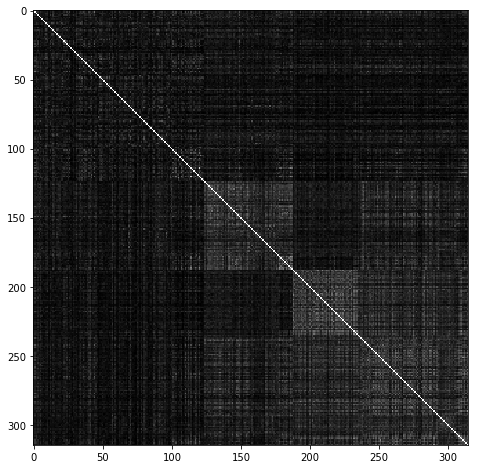

In [51]:
_idx = np.array([]).astype(int)
for kk in range(4):
    iidx = np.where(rst_lbs==kk)[0]
    _idx = np.append(_idx, iidx)
    
grid_ix = np.ix_(_idx, _idx)
plt.close()
plt.imshow(W_mat[grid_ix], interpolation='none')
plt.show()

In [52]:
fname = '/media/zzs/4TB/qingliu/qing_intermediate/unary_weights/motorbike_k2_2_lbs.pickle'
with open(fname, 'wb') as fh:
    pickle.dump(rst_lbs, fh)